###  Chargement des données prétraitées pour l'entraînement

Avant d'entraîner notre modèle de classification, nous devons recharger les **matrices TF-IDF** et les **labels** sauvegardés lors des étapes précédentes.

**Étapes réalisées :**

1. **Chargement des matrices TF-IDF**
   - `X_train` et `X_test` sont chargés au format **.npz** (sparse) via `scipy.sparse.load_npz`.  
   - Ces matrices contiennent les représentations numériques des textes nettoyés.

2. **Chargement des labels**
   - `y_train` et `y_test` sont chargés depuis les fichiers CSV.  


> Après cette étape, nous avons toutes les données prêtes pour l'entraînement et l’évaluation d’un modèle de classification.


In [ ]:
import pandas as pd
import scipy.sparse
import os

# --- Créer le dossier 'processed' s'il n'existe pas (au cas où) ---
os.makedirs('../Data/processed', exist_ok=True)

# --- 1. Chargement des matrices TF-IDF (features) ---
# Les matrices sont au format sparse (.npz) pour économiser de l'espace
X_train = scipy.sparse.load_npz('../Data/processed/X_train_tfidf.npz')
X_test = scipy.sparse.load_npz('../Data/processed/X_test_tfidf.npz')

# --- 2. Chargement des labels (targets) ---
y_train = pd.read_csv('../Data/processed/y_train.csv')['label'].values
y_test  = pd.read_csv('../Data/processed/y_test.csv')['label'].values

# --- Informations de sortie pour vérification ---
print("Données chargées avec succès !")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")


Données chargées avec succès !
X_train shape: (23040, 5000)
X_test shape : (5761, 5000)
y_train shape: (23040,)
y_test shape : (5761,)


###  Entraînement et évaluation de plusieurs modèles de classification

Dans cette étape, nous entraînons et évaluons trois modèles différents sur les données prétraitées et vectorisées : 

1. **Logistic Regression**  
2. **Naive Bayes Multinomial**  
3. **Random Forest Classifier**

**Étapes réalisées pour chaque modèle :**

1. **Entraînement (`fit`)**  
   - Le modèle apprend à prédire les labels à partir des vecteurs TF-IDF (`X_train` et `y_train`).

2. **Prédiction (`predict`)**  
   - Le modèle prédit les labels des données de test (`X_test`).

3. **Évaluation (`accuracy_score`)**  
   - Calcul de la précision (accuracy) sur l’ensemble de test (`y_test`).  
   - Possibilité d’ajouter des métriques supplémentaires comme F1-score, recall, precision via `classification_report`.

Cette étape permet de comparer rapidement les performances de différents modèles sur le même jeu de données.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Définition des modèles à entraîner ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Régression logistique avec 1000 itérations max
    "Naive Bayes": MultinomialNB(),                              # Classificateur Naive Bayes multinomial
    "Random Forest": RandomForestClassifier(n_estimators=100)   # Forêt aléatoire avec 100 arbres
}

# --- Boucle sur chaque modèle ---
for name, model in models.items():
    print(f"--- {name} ---")

    #  Entraînement du modèle
    model.fit(X_train, y_train)
    
    #  Prédiction sur les données de test
    y_pred = model.predict(X_test)
    
    #  Évaluation
    acc = accuracy_score(y_test, y_pred)  # Calcul de la précision
    print(f"Précision (Accuracy) : {acc:.4f}")
    print("-" * 20)

    #  rapport détaillé avec F1-score, recall et precision
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Précision (Accuracy) : 0.9852
--------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3072
           1       0.98      0.99      0.98      2689

    accuracy                           0.99      5761
   macro avg       0.98      0.99      0.99      5761
weighted avg       0.99      0.99      0.99      5761

--- Naive Bayes ---
Précision (Accuracy) : 0.9788
--------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3072
           1       0.97      0.98      0.98      2689

    accuracy                           0.98      5761
   macro avg       0.98      0.98      0.98      5761
weighted avg       0.98      0.98      0.98      5761

--- Random Forest ---
Précision (Accuracy) : 0.9819
--------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3072
           1  

### Résultats de l'évaluation des modèles de classification

Nous avons entraîné trois modèles sur le dataset vectorisé TF-IDF et évalué leurs performances sur l'ensemble de test (5761 échantillons).

| Modèle                | Accuracy | F1-score (moyenne pondérée) |
|-----------------------|---------|-----------------------------|
| Logistic Regression   | 0.9852  | 0.99                        |
| Naive Bayes           | 0.9788  | 0.98                        |
| Random Forest         | 0.9819  | 0.98                        |

---

###  Analyse rapide

1. **Logistic Regression**
   - Meilleure précision globale (98.5%).  
   - F1-score très élevé sur les deux classes (0 et 1), donc équilibre entre precision et recall.  
   - Modèle stable et rapide à entraîner.

2. **Naive Bayes**
   - Légèrement moins précis que Logistic Regression (97.9%).  
   - Très bon équilibre entre recall et precision, mais un peu moins performant sur la classe majoritaire.  
   - Très efficace pour les textes, rapide et léger.

3. **Random Forest**
   - Accuracy intermédiaire (98.2%)  
   - F1-score équilibré sur les deux classes  
   - Plus gourmand en mémoire et temps d'entraînement, mais robuste.

---

###  Conclusion

- **Meilleur modèle : Logistic Regression**  
  - Simple, rapide, haute précision et F1-score.  
- **Naive Bayes et Random Forest** restent de bonnes alternatives selon le contexte.  
- Les trois modèles montrent que le pipeline de prétraitement et de vectorisation TF-IDF est efficace pour la classification du texte.


###  Matrice de confusion du meilleur modèle

Nous visualisons ici la **matrice de confusion** pour le meilleur modèle (`Logistic Regression`) sur l'ensemble de test.

**Objectif :**
- Vérifier combien de prédictions sont correctes et incorrectes pour chaque classe.
- Observer si le modèle confond souvent certaines classes (ex : Ham vs Spam).

**Lecture de la matrice :**
- **Lignes** : classes réelles (`y_test`)
- **Colonnes** : classes prédites (`y_pred`)
- Chaque cellule indique le nombre de prédictions pour la combinaison réelle/prédite.
- Une diagonale forte (grandes valeurs) signifie de bonnes performances.


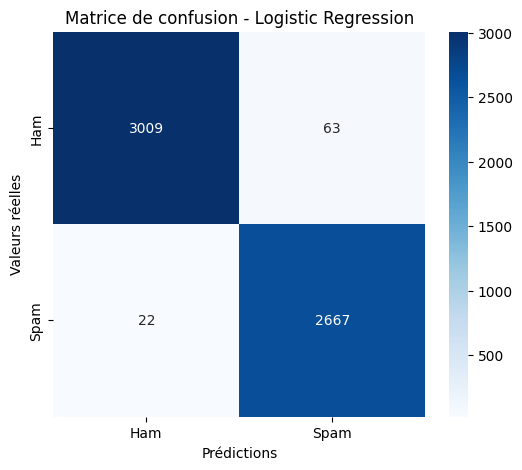

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ---  Sélection du meilleur modèle ---
best_model = models["Logistic Regression"]

# ---  Prédiction sur les données de test ---
y_pred = best_model.predict(X_test)

# ---  Création de la matrice de confusion ---
cm = confusion_matrix(y_test, y_pred)

# ---  Affichage graphique avec seaborn ---
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,               # Affiche les nombres dans chaque cellule
    fmt='d',                  # Format entier
    cmap='Blues',             # Couleur
    xticklabels=['Ham', 'Spam'],  # Noms des colonnes
    yticklabels=['Ham', 'Spam']   # Noms des lignes
)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion - Logistic Regression')
plt.show()


In [5]:
import pickle

with open('../models/spam_detector_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)